In [1]:
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np

from metpy.cbook import get_test_data
import metpy.calc as mpcalc
from metpy.io import get_upper_air_data
from metpy.plots import SkewT
from metpy.units import units, concatenate

%matplotlib inline

In [2]:
from metpy.io.upperair import UseSampleData
with UseSampleData():  # Only needed to use our local sample data
    # Download and parse the data
    dataset = get_upper_air_data(datetime(1999, 5, 4, 0), 'OUN')

p = dataset.variables['pressure'][:]
T = dataset.variables['temperature'][:]
Td = dataset.variables['dewpoint'][:]
u = dataset.variables['u_wind'][:]
v = dataset.variables['v_wind'][:]

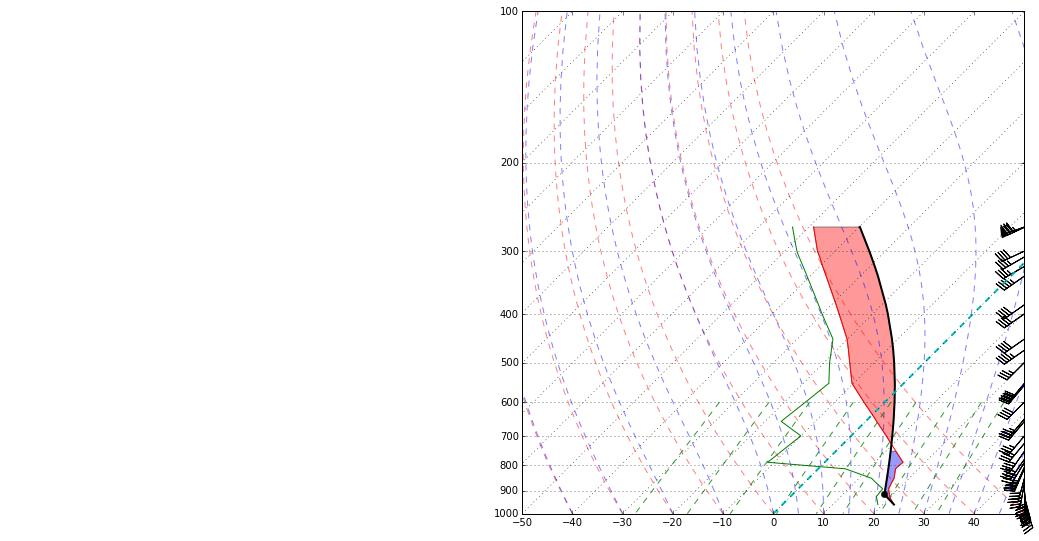

In [3]:
# Create a new figure. The dimensions here give a good aspect ratio
fig = plt.figure(figsize=(9, 9))
skew = SkewT(fig, rotation=45)

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
skew.plot(p, T, 'r')
skew.plot(p, Td, 'g')
skew.plot_barbs(p, u, v)
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-40, 60)

# Calculate LCL height and plot as black dot
l = mpcalc.lcl(p[0], T[0], Td[0])
lcl_temp = mpcalc.dry_lapse(concatenate((p[0], l)), T[0])[-1].to('degC')
skew.plot(l, lcl_temp, 'ko', markerfacecolor='black')

# Calculate full parcel profile and add to plot as black line
prof = mpcalc.parcel_profile(p, T[0], Td[0]).to('degC')
skew.plot(p, prof, 'k', linewidth=2)

# Example of coloring area between profiles
skew.ax.fill_betweenx(p, T, prof, where=T>=prof, facecolor='blue', alpha=0.4)
skew.ax.fill_betweenx(p, T, prof, where=T<prof, facecolor='red', alpha=0.4)

# An example of a slanted line at constant T -- in this case the 0
# isotherm
l = skew.ax.axvline(0, color='c', linestyle='--', linewidth=2)

# Add the relevant special lines
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()

# Show the plot
plt.show()